In [93]:
import random
import numba as nb
import numpy as np
import math
import matplotlib.pyplot as plt
import copy


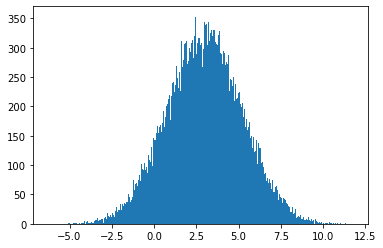

In [94]:
def Central_Limit_Theorem_gaussian_distribution(mean, varianve):
    # Box–Muller method
    sum = 0
    for i in range(12):
        sum += random.uniform(0,1.0)
    X = (sum - 6) * math.sqrt(varianve) + mean
    return X

def Box_Muller_gaussian_distribution(mean, varianve):
    # Box–Muller method
    U = random.uniform(-1.0,1.0)
    V = random.uniform(-1.0,1.0)
    
    X = math.sqrt(-2*np.log(U)) * math.cos(2*np.pi*V)
    Y = math.sqrt(-2*np.log(V)) * math.sin(2*np.pi*U)
    return X

distribution = []
for i in range(100000):
    distribution.append(Central_Limit_Theorem_gaussian_distribution(3,5))
plt.hist(distribution,1000)
plt.show()

def polynomial_basis_linear_generator(n,a,w):
    e = Central_Limit_Theorem_gaussian_distribution(0,a)
    x = random.uniform(-1.0,1.0)
    print(f"x: {x} e: {e}")
    y = 0
    for i in range(n):
        y += w[i] * (x**i)
    return [x , y+e]

Gradient descent:
w:
[[-25.03429285]
 [  1.43067529]
 [  3.56469502]]
Confusion Matrix:
             Predict cluster 1 Predict cluster 2
Is cluster 1       50               0
Is cluster 2       0               50

Sensitivity (Successfully predict cluster 1): 1.0
Specificity (Successfully predict cluster 2): 1.0
------------------------------------
Newton's method:
w
[[-20.8595321 ]
 [  1.70534654]
 [  2.55658915]]
Confusion Matrix:
             Predict cluster 1 Predict cluster 2
Is cluster 1       50               0
Is cluster 2       0               50

Sensitivity (Successfully predict cluster 1): 1.0
Specificity (Successfully predict cluster 2): 1.0


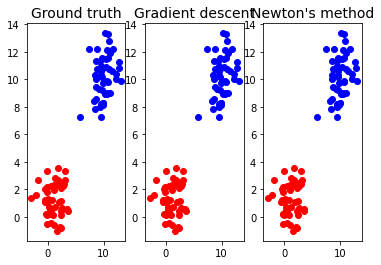

Gradient descent:
w:
[[-1.96451538]
 [ 0.58698323]
 [ 0.4992507 ]]
Confusion Matrix:
             Predict cluster 1 Predict cluster 2
Is cluster 1       39               11
Is cluster 2       17               33

Sensitivity (Successfully predict cluster 1): 0.78
Specificity (Successfully predict cluster 2): 0.66
------------------------------------
Newton's method:
w
[[-1.96433285]
 [ 0.58695048]
 [ 0.4992089 ]]
Confusion Matrix:
             Predict cluster 1 Predict cluster 2
Is cluster 1       39               11
Is cluster 2       17               33

Sensitivity (Successfully predict cluster 1): 0.78
Specificity (Successfully predict cluster 2): 0.66


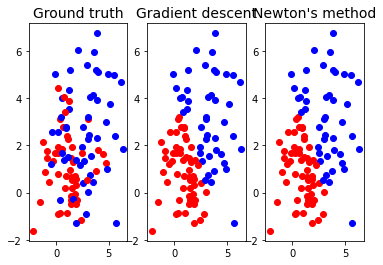

In [151]:
def visualization(A, B, predict_gradient, predict_newton):
    plt.subplot(1, 3, 1)
    plt.title('Ground truth', fontsize = 14)
    # plt.xlabel("x", fontsize = 12)
    # plt.ylabel("y", fontsize = 12)

    for idx, point in enumerate(A):
        if B[idx] == 0:    
            plt.plot(point[1],point[2], 'ro')
        else:
            plt.plot(point[1],point[2], 'bo')

    plt.subplot(1, 3, 2)
    plt.title('Gradient descent', fontsize = 14)
    # plt.xlabel("x", fontsize = 12)
    # plt.ylabel("y", fontsize = 12)
    
    for idx, point in enumerate(A):
        if predict_gradient[idx] == 0:    
            plt.plot(point[1],point[2], 'ro')
        else:
            plt.plot(point[1],point[2], 'bo')

    plt.subplot(1, 3, 3)
    plt.title("Newton's method", fontsize = 14)
    # plt.xlabel("x", fontsize = 12)
    # plt.ylabel("y", fontsize = 12)

    for idx, point in enumerate(A):
        if predict_newton[idx] == 0:    
            plt.plot(point[1],point[2], 'ro')
        else:
            plt.plot(point[1],point[2], 'bo')

    plt.show()
    

def Newton_method(A, W, B, H, lr=0.01):
    H_inv = np.linalg.inv(H)
    while (True):
        gradient = H_inv @ A.T @ (B - 1/(1+np.exp(-A@W))) 
        W_new = W + lr * gradient

        if( abs(np.sum(gradient)) < 1e-4 ):
            break
        W = W_new

    return W

def steepest_gradient_descent(A, W, B, lr=0.01):
    while (True):
        gradient = A.T @ (B - 1/(1+np.exp(-A@W)))
        W_new = W + lr * gradient

        if( abs(np.sum(gradient)) < 1e-4 ):
            break
        W = W_new

    return W

def generate_data(N=50, mx1=1, my1=1, mx2=10, my2=10, ux1=2, uy1=2, ux2=2, uy2=2):
    D1 = []
    D2 = []
    A = []
    B = []    
    
    for i in range(N):
        D1x = Central_Limit_Theorem_gaussian_distribution(mx1,ux1)
        D1y = Central_Limit_Theorem_gaussian_distribution(my1,uy1)
        D2x = Central_Limit_Theorem_gaussian_distribution(mx2,ux2)
        D2y = Central_Limit_Theorem_gaussian_distribution(my2,uy2)
        D1.append((D1x, D1y, 0))
        D2.append((D2x, D2y, 1))
        A.append([1, D1x, D1y])
        B.append(0)
        A.append([1, D2x, D2y])
        B.append(1)
    return np.array(A), np.array(B).reshape(-1,1), np.array(D1), np.array(D2)

def get_hessian(A,w):
    # H(J) = A^T * D * A
    r,c = A.shape
    D = np.zeros([r,r])
    for i in range(r):
        D[i,i] = np.exp(-A[i]@w)/((1+np.exp(-A[i]@w))**2)
    
    H = A.T @ D @ A

    return H

def predict(A,W):
    r,c = A.shape
    predict_B = np.zeros(r)
    for i in range(r):
        if not A[i]@W < 0:
            predict_B[i] = 1
    return predict_B

def confusion_matrix(B,predict):
    TP, FN, FP, TN = 0, 0, 0, 0 #true positive, true negative, false positive, false negative

    for i in range(len(B)):
        if B[i]==predict[i]:
            if B[i] == 0 :
                TP += 1
            else:
                TN += 1
        else:
            if B[i] == 0 :
                FN += 1
            else:
                FP += 1

    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)

    print(f"Confusion Matrix:")
    print(f"             Predict cluster 1 Predict cluster 2")
    print(f"Is cluster 1       {TP}               {FN}")
    print(f"Is cluster 2       {FP}               {TN}")
    print(f"")
    print(f"Sensitivity (Successfully predict cluster 1): {sensitivity}")
    print(f"Specificity (Successfully predict cluster 2): {specificity}")

def Logistic_regression(N=50, mx1=1, my1=1, mx2=10, my2=10, ux1=2, uy1=2, ux2=2, uy2=2):
    A, B, D1, D2 = generate_data(N, mx1, my1, mx2, my2, ux1, uy1, ux2, uy2)
    W = np.random.random_sample((3,1))
    H = get_hessian(A,W) # H(J) = A^T * D * A hessian is semi-positive not guarantee invertiable

    if np.linalg.det(H) > 0:
       w_newton = Newton_method(A,W,B,H,lr=0.01)

    w_gradient = steepest_gradient_descent(A,W,B,lr=0.01)

    print(f"Gradient descent:")
    print(f"w:\n{w_gradient}")
    predict_gradient = predict(A,w_gradient)
    confusion_matrix(B,predict_gradient) 

    print(f"------------------------------------")

    print(f"Newton's method:")
    print(f"w\n{w_newton}")
    predict_newton = predict(A,w_newton)
    confusion_matrix(B,predict_newton)

    visualization(A, B, predict_gradient, predict_newton)

Logistic_regression(N=50, mx1=1, my1=1, mx2=10, my2=10, ux1=2, uy1=2, ux2=2, uy2=2)
Logistic_regression(N=50, mx1=1, my1=1, mx2=3, my2=3, ux1=2, uy1=2, ux2=4, uy2=4)

In [96]:
import gzip
import time
import copy
import numpy as np
from keras.datasets import mnist
from scipy.optimize import linear_sum_assignment
import warnings

warnings.filterwarnings('ignore')
# warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

def Loadimage():
    (train_X, train_y), (test_X, test_y) = mnist.load_data()
    train_X = train_X.reshape(len(train_X),-1)
    train_X = np.array(train_X)
    train_X = train_X // 128
    #train_X=np.asarray(train_X>=128,dtype='uint8')
    return (train_X ,train_y)

#Loadimage()


In [111]:
def result(probability):
    for i in range(10):
        print(f"class {i}:")
        for row in range(28):
            for column in range(28):
                if probability[i, row*28 + column] >= 0.5 :
                    print(f"1",end=" ")
                else:
                    print(f"0",end=" ")
            print("")
        print("")


def final_result(probability,classes):
    for i in range(10):
        print(f"class {i}:")
        labeled = classes[i]
        for row in range(28):
            for column in range(28):
                if probability[labeled, row*28 + column] >= 0.5 :
                    print(f"1",end=" ")
                else:
                    print(f"0",end=" ")
            print("")
        print("")

In [150]:
def EM_algorithm(train_images,train_labels):
    eps = 1
    diff =1000
    temp = 100
    Lambda, p = init_parameter()
    iter = 0
    while abs(temp-diff)>eps and diff>eps:
    #while iter<100:
        w = Estep(train_images, Lambda, p)
        new_Lambda, new_p = Mstep(train_images, w)

        temp = diff
        diff = np.sum(np.abs(Lambda-new_Lambda)) + np.sum(np.abs(p-new_p))
        print(f"No. of Iteration: {iter}, Difference: {diff}")
        print(diff)
        
        Lambda = new_Lambda
        p = new_p
        iter+=1
        result(p)

    predict=np.argmax(w,axis=1)
    correct =0
    for i in range(len(train_labels)):
        #if i % 1000 == 0:
        #print(predict[i],train_labels[i])
        if predict[i]==train_labels[i]:
            correct += 1


    distribuction = pixelvalue_distirbution(train_images,train_labels)
    classes = matching(distribuction,p)
    print(classes)
    confusion_matrix1(train_labels,predict,classes)

    final_result(p,classes)
    error_rate(iter,train_labels,predict,classes)


def init_parameter():
    Lambda = np.random.rand(10)
    #print(np.sum(Lambda))
    Lambda = Lambda/np.sum(Lambda)
    #print(Lambda.shape)
    #print(np.sum(Lambda))
    p = np.random.rand(10,784)
    return Lambda, p

@nb.jit
def Estep(train_images, Lambda, p):

    p_complement = 1 - p
    w = np.ones((60000,10))

    for image in range(len(train_images)):
        for l in range(len(Lambda)):
            #w[image,l]=np.prod(train_images[image]*p[l]+(1-train_images[image])*p_complement[l])
            for pixel in range(28*28):
                w[image,l] *= ((train_images[image][pixel] * p[l][pixel] +
                              (1 - train_images[image][pixel]) * p_complement[l][pixel]))        
    
    # for l in range(len(Lambda)):
    #     w[:l] = w[:l] * Lambda[l]
    w = w*Lambda.reshape(1,-1)            
    sums = np.sum(w,axis=1).reshape(-1,1)
    sums[sums==0] = 1
    w = w/sums
        
    return w

def Mstep(train_images,w):
    Lambda = np.sum(w,axis=0)
    Lambda = Lambda / 60000
    
    sums = np.sum(w,axis=0)
    sums[sums==0] = 1
    w_norm = w/sums
    
    new_p = train_images.T@w_norm

    return Lambda.T, new_p.T
    


@nb.jit
def pixelvalue_distirbution(train_images,train_label):
    
    labels = np.zeros(10)
    for idx, label in enumerate(train_label):
        labels[label] += 1
    
    distribuction = np.zeros((10,784))

    for image in range(len(train_images)):
        label = train_label[image]
        for pixel in range(28*28):
            if train_images[image,pixel] == 1:
                distribuction[label, pixel] += 1

    labels = labels.reshape(-1,1)

    distribuction = distribuction / labels

    return distribuction

def matching(distribuction,p):
    cost = np.zeros((10,10))
    for i in range(10):
        for j in range(10):
            cost[i,j] = np.linalg.norm(distribuction[i]-p[j])

    row_ind, col_ind = linear_sum_assignment(cost)

    classes = col_ind

    return classes


def confusion_matrix1(train_labels,predict,classification):
    TP, FN, FP, TN = 0, 0, 0, 0 #true positive, true negative, false positive, false negative
    for i in range(10):
        TP, FN, FP, TN = 0, 0, 0, 0
        Labels = classification[i]
        for image in range(len(train_labels)):
            if train_labels[image]==predict[image]:
                if predict[image] == Labels :
                    TP += 1
                else:
                    FP += 1
            else:
                if predict[image] == Labels :
                    FN += 1
                else:
                    TN += 1
            # if train_labels[image]!=i and predict[image]!=Labels:
            #     TN+=1
            # elif train_labels[image]==i and predict[image]==Labels:
            #     TP+=1
            # elif train_labels[image]!=i and predict[image]==Labels:
            #     FP+1
            # else:
            #     FN+=1

        sensitivity = TP / (TP + FN+1)
        specificity = TN / (TN + FP+1)

        print(f"Confusion Matrix: {Labels}")
        print(f"             Predict number {Labels} Predict not number {Labels}")
        print(f"Is number {Labels}       {TP}               {FN}")
        print(f"Isn't number {Labels}      {FP}               {TN}")
        print(f"")
        print(f"Sensitivity (Successfully predict number {Labels}): {sensitivity}")
        print(f"Specificity (Successfully predict not number {Labels}): {specificity}")
        print("")

def error_rate(iter, train_labels, predict, classes):
    print(f"Total iteration to converge: {iter}")
    real_transform = np.zeros(60000)
    for i in range(len(train_labels)):
        real_transform[i] = classes[predict[i]]
    error_rate = np.count_nonzero(real_transform - predict)/60000
    print(f"Total error rate: {error_rate}")


train_images, train_labels = Loadimage()
EM_algorithm(train_images,train_labels)


No. of Iteration: 0, Difference: 3552.211434391882
3552.211434391882
class 0:
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 
0 0 0 0 0 